<a href="https://colab.research.google.com/github/Sangyeonglee353/ai-hongong/blob/main/Chapter_08_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch08-2 | 합성곱 신경망을 사용한 이미지 분류

## 패션 MNIST 데이터 불러오기

In [1]:
# 1. 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4422102/4422102 [==============================] - 0s 0us/step


## 합성곱 신경망 만들기

In [2]:
# 1. 합성곱 층 만들기
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
# (28, 28, 32)

In [3]:
# 2. 풀링 층 추가
model.add(keras.layers.MaxPooling2D(2))
# (14, 14, 32)

In [4]:
# 3. 두 번째 합성곱-폴링 층 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
# (7, 7, 64)

In [5]:
# 4. 3차원 특성맵 펼치고 출력하기
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
# 5. 모델 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

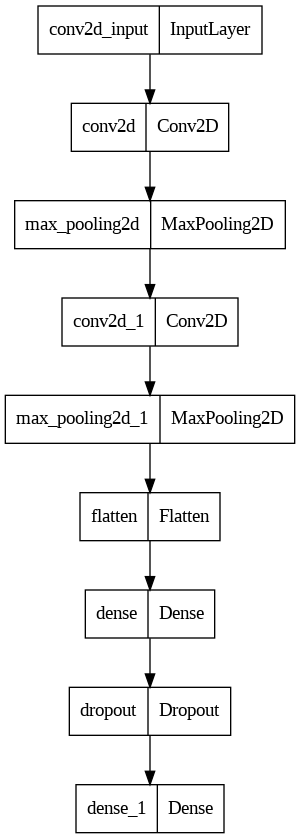

In [7]:
# 6. 그림으로 확인
keras.utils.plot_model(model)

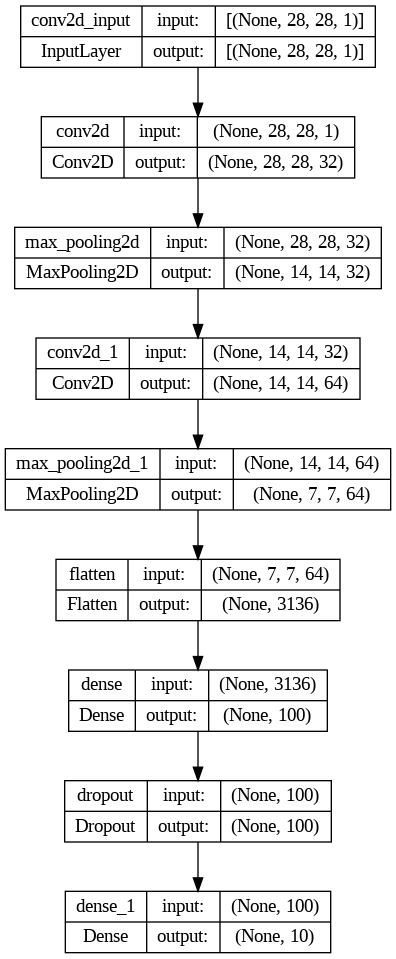

In [8]:
# 7. 그림으로 확인하기(입출력값 포함)
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일과 훈련

In [9]:
# 모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 12s 5ms/step - loss: 0.5176 - accuracy: 0.8150 - val_loss: 0.3262 - val_accuracy: 0.8794
Epoch 2/20
  32/1500 [..............................] - ETA: 4s - loss: 0.3813 - accuracy: 0.8721

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 6s 4ms/step - loss: 0.3424 - accuracy: 0.8784 - val_loss: 0.2850 - val_accuracy: 0.8911
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2950 - accuracy: 0.8932 - val_loss: 0.2615 - val_accuracy: 0.9012
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2602 - accuracy: 0.9058 - val_loss: 0.2515 - val_accuracy: 0.9092
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2386 - accuracy: 0.9122 - val_loss: 0.2293 - val_accuracy: 0.9154
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2181 - accuracy: 0.9181 - val_loss: 0.2451 - val_accuracy: 0.9119
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2048 - accuracy: 0.9232 - val_loss: 0.2280 - val_accuracy: 0.9170
Epoch 8/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1858 - accuracy: 0.9301 - val_loss: 0.2322 - val_accuracy: 0.9164
Epo

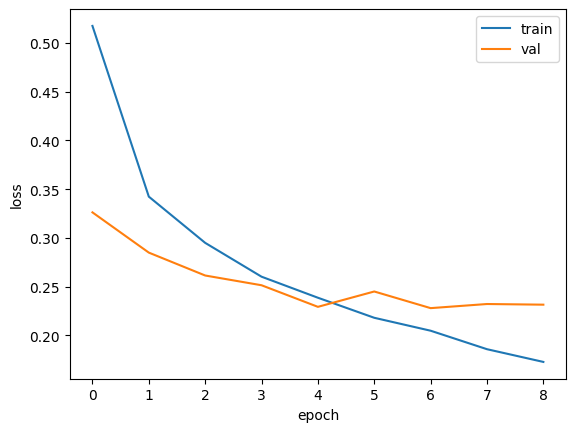

In [10]:
# 2. 결과 시각화 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
# 3. 세트에 대한 성능 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2280 - accuracy: 0.9170


[0.22797264158725739, 0.9169999957084656]

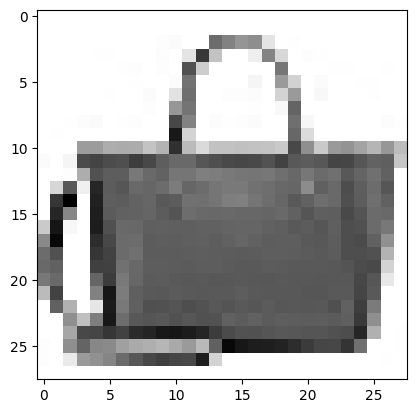

In [12]:
# 4. 첫 번째 샘플 이미지 확인
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [13]:
# 5. 10개의 클래스에 대한 예측 확률 출력
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 210ms/step
[[1.1391213e-14 4.9298223e-22 2.4443009e-18 9.2485230e-16 7.8541516e-16
  3.1291575e-12 1.4550374e-13 2.5376846e-14 1.0000000e+00 1.4260353e-12]]


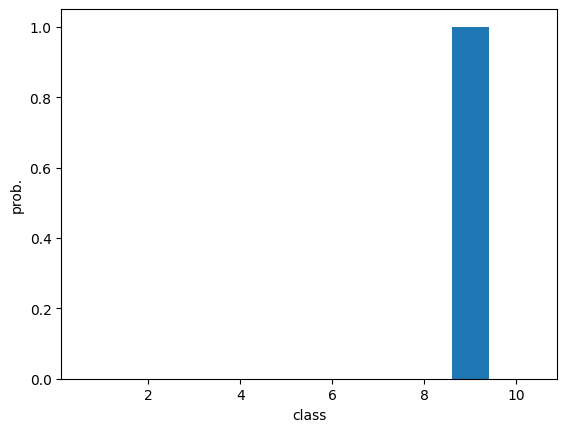

In [14]:
# 6. 막대 그래프로 확인
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [15]:
# 7. 레이블을 리스트에 저장
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [16]:
# 8. 레이블로 활용
import numpy as np
print(classes[np.argmax(preds)])

가방


In [17]:
# 9. 픽셀값의 범위를 0~1 사이로 변경 & 이미지 크기 (28, 28) => (28, 28, 1)로 변경
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [18]:
# 10. 테스트 세트에 대한 성능 측정
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2477 - accuracy: 0.9095


[0.2476840615272522, 0.909500002861023]

In [19]:
# 전체 소스 코드: https://bit.ly/hg-08-2

# Ch08-3 | 합성곱 신경망의 시각화

## 가중치 시각화

In [2]:
# 1. 파일 읽기
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [3]:
# 2. 레이어 확인
model.layers

In [4]:
# 3. 첫 번째 원소의 wights의 첫 번째 원소(가중치)와 두 번재 원소(절편) 크기 출력
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
# 4. 가중치 배열의 평균과 표준편차 계산
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.03928251 0.25501627


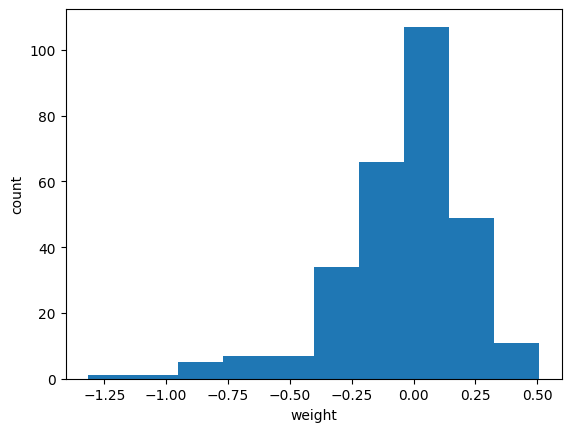

In [6]:
# 5. 시각화로 확인
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

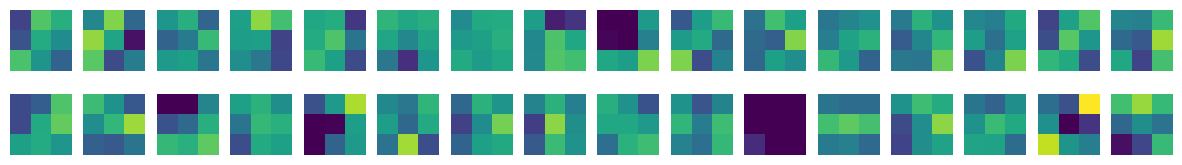

In [7]:
# 6. 커널 출력
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5) # 픽셀의 강도 표현(밝은 곳: 높음)
    axs[i, j].axis('off')
plt.show()

In [8]:
# 7. 훈련하지 않은 빈 합성곱 신경망 생성
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                          'relu', padding='same', input_shape=(28, 28, 1)))

In [9]:
# 8. 첫 번째 층의 가중치를 no_training_conv 변수에 저장
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [10]:
# 9. 가중치의 평균과 표준편차 확인
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0032892982 0.08295835


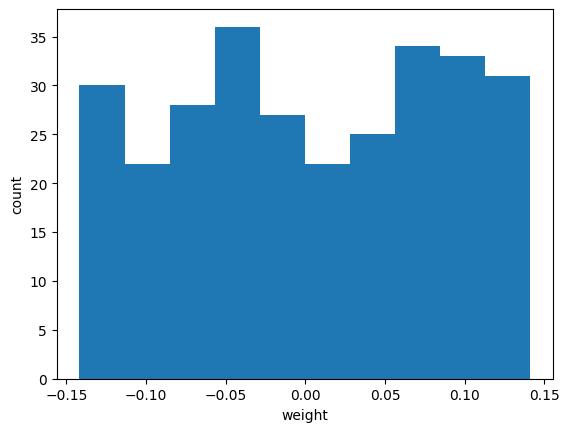

In [11]:
# 10. 가중치 배열 히스토그램으로 표현
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

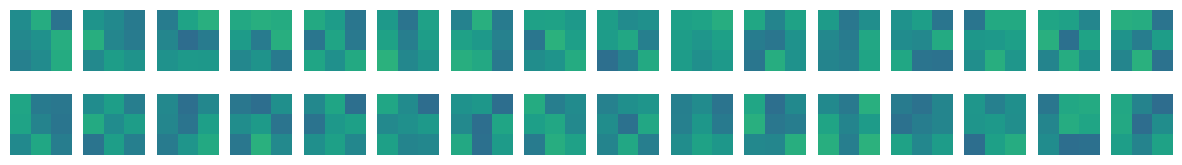

In [12]:
# 11. 가중치 값 재확인
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

## 함수형 API

In [32]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [15]:
# 1. 함수형 API 테스트
# dense1= keras.layers.Dense(100, activation='sigmoid')
# dense2= keras.layers.Dense(10, activation='softmax')

# inputs = keras.Input(shape=(784,))

# hidden = dense1(inputs)
# outputs = dense2(hidden)

# model = keras.Model(inputs, outputs)

# inputs = keras.Input(shape=(784,))

print(model.input)

conv_acti = keras.Model(model.input, model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


## 특성 맵 시각화

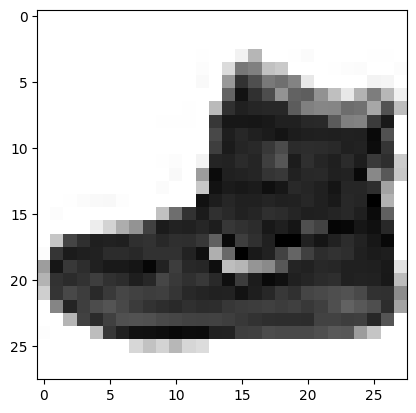

In [13]:
# 1. 첫 번째 샘플 그려보기
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [16]:
# 2. 하나의 샘플을 전달하더라도 꼭 첫 번째 차원 유지해야 함.
# 2.1 슬라이싱 연산자를 사용해 첫 번째 샘플 선택
# 2.2 (784, ) 크기를 (28, 28, 1) 크기로 변경하고 255로 나눔
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 462ms/step


In [17]:
# 3. feature_maps의 크기 확인
print(feature_maps.shape)

(1, 28, 28, 32)


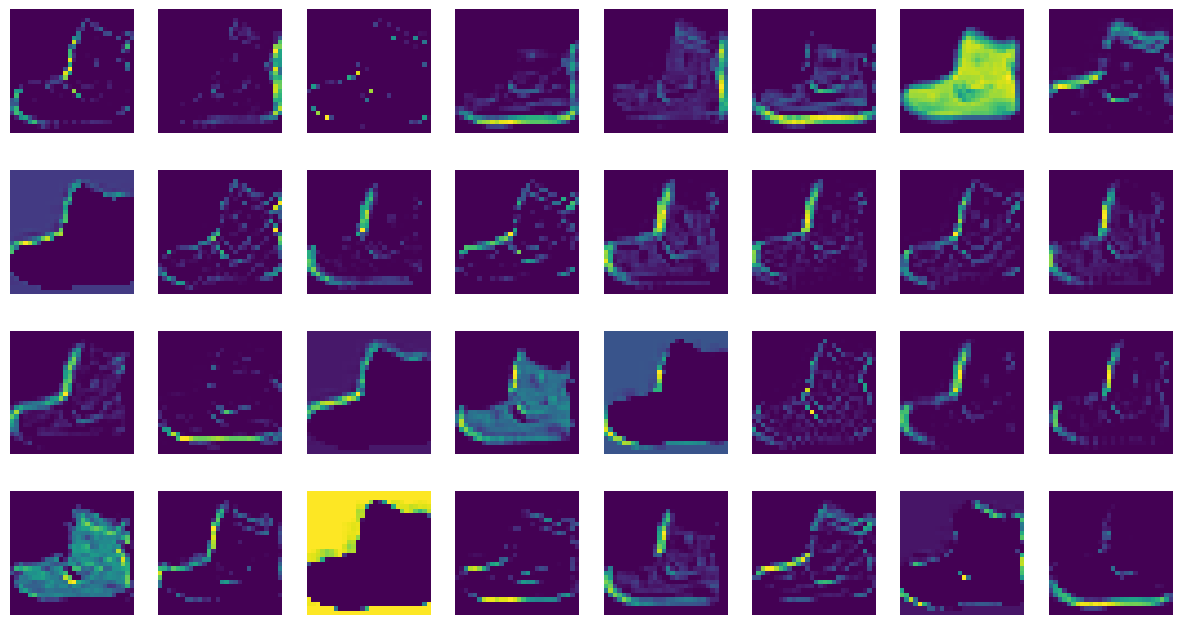

In [18]:
# 4. 32개의 특성 맵 4개의 행으로 그리기
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')
plt.show()

In [19]:
# 5. 두 번째 합성곱 층이 만든 특성 맵 확인
# 5.1 model 객체의 입력과 두 번째 합성곱 층인 model.layers[2]의 출력을 연결한 conv2_acti 모델 생성
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [21]:
# 5.2 predict() 메서드에 전달
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 211ms/step


In [22]:
# 5.3 배치 차원 확인
print(feature_maps.shape)

(1, 14, 14, 64)


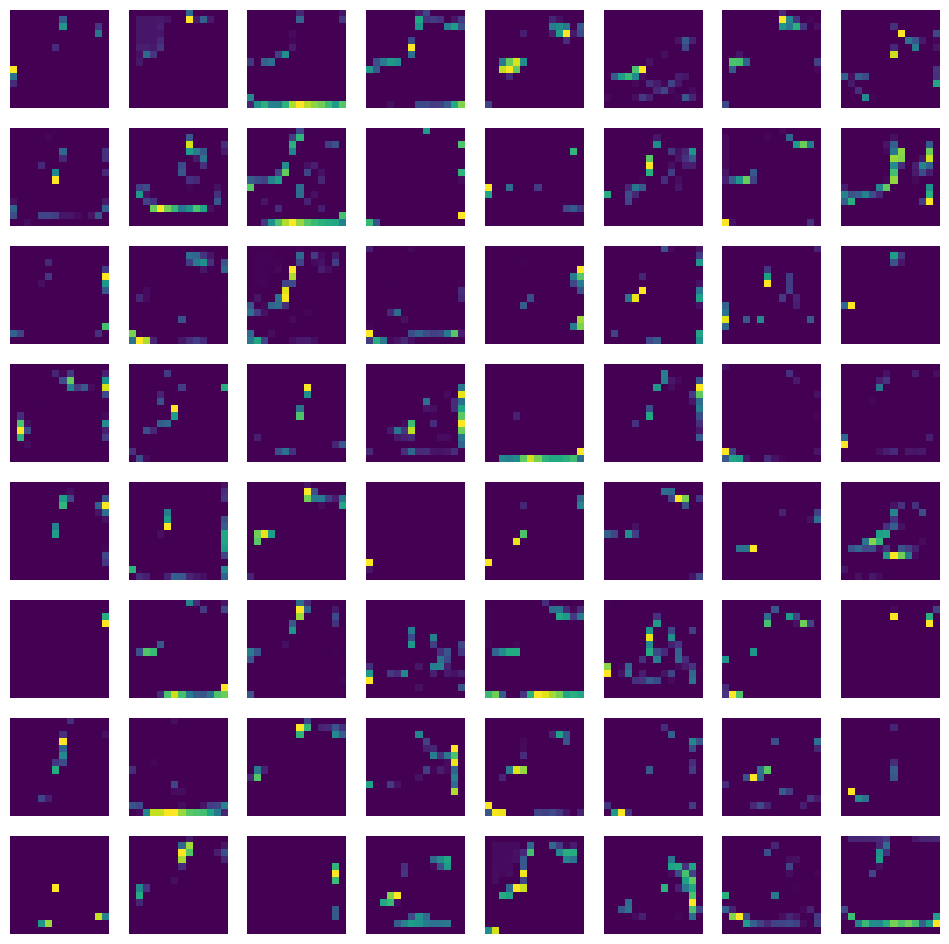

In [24]:
# 5.4 64개의 특성 맵을 8개씩 확인
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')
plt.show()

In [25]:
# 전체 소스 코드: https://bit.ly/hg-08-3